In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [58]:

df=pd.read_csv('/Users/simennaess/Documents/Master/Ukentlig_vareid_ys_kunde_time_lag_15_20.csv', parse_dates=['Ukedato'], sep=";", decimal=",", header=0)



In [59]:
#Replace NaN with 0 for bool features(where it makes sense)

df['Ferie_max'],df['Jul_max'],df['Påske_max'] = df['Ferie_max'].fillna(0), df['Jul_max'].fillna(0), df['Påske_max'].fillna(0)


In [60]:
#Group, agg and rename

df_grouped=df.groupby(['Ukedato','Kjedeprofil','Vare_Id']).agg({'Salg_sum':'sum', 'Pris':'mean','Kampanje':'mean','Varebeholdning_sum':'sum','Ferie_max':'mean','Jul_max':'mean','Påske_max':'mean','Salg_sum_lag_1':'sum','Salg_sum_lag_2':'sum','Salg_sum_lag_3':'sum'}).rename(columns={'Salg_sum':'Sales', 'Pris':'Price','Kampanje':'Sales Promotion', 'Varebeholdning_sum':'Inventory','Ferie_max':'Vacation','Jul_max':'Christmas','Påske_max':'Easter','Salg_sum_lag_1':'Sales_lag_1','Salg_sum_lag_2':'Sales_lag_2','Salg_sum_lag_3':'Sales_lag_3' }).reset_index()



In [63]:
#One-hot encoder to get dummies for kjedeprofil

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

df_dum_kjede=encode_and_bind(df_grouped,'Kjedeprofil')
df_dum_prod=encode_and_bind(df_dum_kjede,'Vare_Id')
df_dum=df_dum_prod.copy()

df_dum.size

5185128

In [62]:
df_dum.size
#df_grouped.size
#df.size

4969081

In [64]:
df_dum.sample(n=30).head(30)

,Ukedato,Kjedeprofil,Vare_Id,Sales,Price,Sales Promotion,Inventory,Vacation,Christmas,Easter,...,Kjedeprofil_ENKELTSTÅENDE DAGLIGVAREBUT.,Kjedeprofil_JOKER,Kjedeprofil_KIWI NORGE AS,Kjedeprofil_KJØPMANNSHUSET NORGE UPROF,Kjedeprofil_KONSUM GRUPPEN NORGE AS,Kjedeprofil_MENY,Kjedeprofil_MIX,Kjedeprofil_NÆRBUTIKKEN,Kjedeprofil_SPAR BUTIKKENE,Vare_Id
203129,2020-07-06,JOKER,9630,474.0,18.840190,0.000000,3574.0,0.000000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,9630
185726,2020-03-09,JOKER,9994,13.0,45.900000,0.000000,40.0,0.000000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,9994
1662,2015-10-19,JOKER,9863,101.0,67.252475,0.000000,11.0,0.000000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,9863
184471,2020-02-24,SPAR BUTIKKENE,14910,245.0,30.729388,0.000000,2854.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,14910
138585,2019-03-11,JOKER,15619,10.0,45.900000,0.000000,0.0,0.000000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,15619
90910,2018-02-05,KIWI NORGE AS,15429,14.0,64.900000,0.000000,0.0,0.000000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,15429
207161,2020-08-03,CC MAT,9998,10.0,58.300000,0.000000,108.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,9998
20524,2016-04-11,NÆRBUTIKKEN,9995,5.0,43.900000,0.000000,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,9995
215986,2020-09-28,SPAR BUTIKKENE,16301,18.0,23.950000,0.000000,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,16301
167569,2019-10-21,CC MAT,9995,1.0,53.400000,0.000000,17.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,9995


In [19]:
brands=df_grouped['Kjedeprofil'].unique()
#Produkter hentet fra produktseleksjon (vasket og deretter hentet ut basert på at de står for 100%, 50% eller 10% 
#av maksvolumet for enkeltprodukter, samt sesongprodukter. Blant allProducts er det også 12 
#ekstra produkter som ligger mellom mid-> low runners.)

selectedTopProducts=[10133,9662,9399,9306,9400,10135,9898,9630,9897,9860]
selectedMidProducts=[14759,9901,10019,14536,14508,9994,16444,16353,9995, 9307]
selectedLowProducts=[14238,14288,14542,10002,10197,16408,16527, 14563, 9541] 
selectedSeasonalProducts=[10022, 9560, 10005, 9541]

allSelectedProducts=[10133, 9662, 9399, 9306, 9400, 10135, 9898, 9630, 9897, 9860, 14759, 
                     9901, 10019, 14508, 9994, 16444, 16353, 9995, 9205, 14760, 15112, 14536, 16409, 
                     10022, 14540, 14251, 14490, 10017, 9560, 10005, 14238, 10002, 10197, 16408, 14288, 16527, 9541]



In [20]:
def minmaxScaling(df, brands, products):
    data_scaled=[]
    for brand in brands:
        for product in products:
            try: 
                dfnorm=df.loc[(df['Kjedeprofil']==brand) & (df['Vare_Id']==product)].copy()
                if dfnorm.empty:
                    continue
                #normalize the data
                scaler = MinMaxScaler()
                # scaling data between 0 and 1
                dfnorm[['Sales', 'Price', 'Sales Promotion', 'Inventory', 'Vacation', 'Christmas','Easter', 'Sales_lag_1',
                   'Sales_lag_2', 'Sales_lag_3']]=scaler.fit_transform(dfnorm[['Sales', 'Price', 'Sales Promotion', 'Inventory', 'Vacation', 'Christmas','Easter','Sales_lag_1',
                   'Sales_lag_2', 'Sales_lag_3']])
                #add each df to list 
                data_scaled.append(dfnorm)
            except ValueError as ve:
                print(ve)
    #concat list elements in one df
    df_scaled = pd.concat(data_scaled)
    return df_scaled
 
df_scaled=minmaxScaling(df_grouped, brands, allSelectedProducts)


In [21]:
df_scaled.describe()

,Vare_Id,Sales,Price,Sales Promotion,Inventory,Vacation,Christmas,Easter,Sales_lag_1,Sales_lag_2,Sales_lag_3
count,47083.000000,47083.000000,47083.000000,47083.000000,47083.000000,47083.000000,47083.000000,47083.000000,47083.000000,47083.000000,47083.000000
mean,11288.001381,0.229113,0.660270,0.023678,0.246564,0.073922,0.008984,0.019706,0.267210,0.267458,0.267088
std,2312.791219,0.206042,0.267415,0.143990,0.253323,0.219677,0.087452,0.125455,0.215468,0.215656,0.215865
min,9205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9662.000000,0.078439,0.517311,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.110236,0.105292
50%,10005.000000,0.166667,0.715061,0.000000,0.200436,0.000000,0.000000,0.000000,0.217992,0.222104,0.222010
75%,14288.000000,0.326923,0.860270,0.000000,0.401137,0.000000,0.000000,0.000000,0.370968,0.375000,0.379032
max,16527.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

prediction_length=4

estimator = DeepAREstimator(freq="W-mon", 
                            prediction_length=3,
    distr_output = NegativeBinomialOutput(),
    use_feat_dynamic_real=True,
    use_feat_static_cat=True,
    cardinality=stat_cat_cardinalities,
    trainer=Trainer(
        learning_rate=1e-3,
        epochs=40,
        num_batches_per_epoch=50,
        batch_size=32
    ))

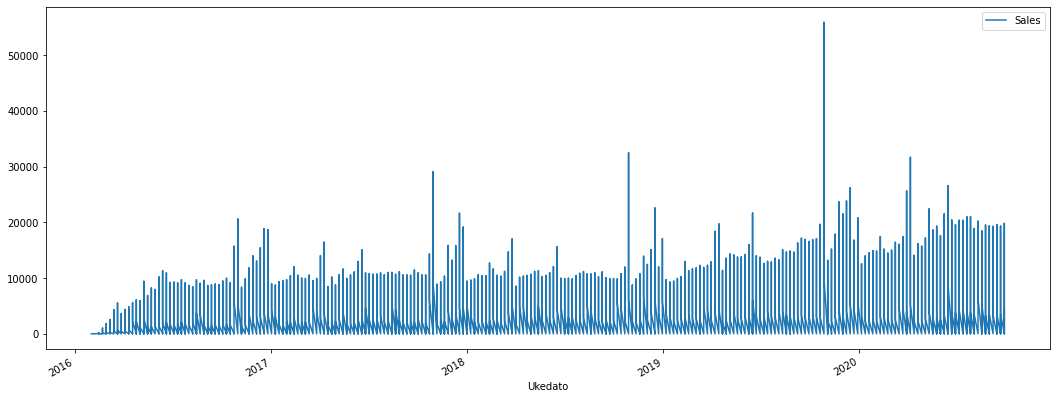

Length of the time series - 1903


In [54]:

# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Import data
#df1 = df_scaled.loc[df_scaled['Vare_Id']==10133]
df1= df_dum.loc[df_grouped['Vare_Id']==10133]#.groupby(['Ukedato','Vare_Id']).agg({'Sales':'sum', 'Price':'mean','Sales Promotion':'mean','Inventory':'sum','Vacation'
                                                                                      # :'mean','Christmas':'mean','Easter':'mean','Sales_lag_1':'sum','Sales_lag_2':
                                                                                     # 'sum','Sales_lag_3':'sum'}).reset_index()


# Plot data
df1.plot('Ukedato', 'Sales')
plt.show()

print(f'Length of the time series - {len(df1)}')

# numpy array with time series
traffic = np.array(df1['Sales'])